In [4]:
import os
import math
import inspect
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial.transform import Rotation

os.chdir(r'/home/or/dev/Face-Recognition-Of-Masked-Faces')
from config_file import ALL_MASKS
from helpers import get_model, read_images, get_1id_pose, resize_image, img_output_bbox, project_3d
from create_masks import load_3dmm, get_rest_mask, masks_templates
from config_file import config, SUNGLASSES_MASK_NAME, COVID19_MASK_NAME, CENTER_FACE_PART
from masks_indices import get_lens, get_mask_string, get_sunglasses_left_eye
from masks_indices import make_sunglasses_mask, make_covid19_mask, make_hat_mask, make_eye_mask

In [5]:
img_src = '/home/or/dev/Expression-old/images/lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg'

In [7]:
masks_to_create = masks_templates(ALL_MASKS)

# Get 3D model
verts, vertsr = load_3dmm()
x=vertsr[:,0];y=vertsr[:,1];z=vertsr[:,2];

# Get img2pose model
model, transform = get_model()
img = plt.imread(img_src, 1)
results = model.predict([transform(img)])[0]
pose, bbox = get_1id_pose(results, img, 0)
r_img, scale_factor = resize_image(img, bbox)

# output image selected area
output_bbox = img_output_bbox(img, bbox, 0.25, True)

# project 3D face according to pose
df_3dh = project_3d(r_img, pose)

right_lens_inds, left_lens_inds, sunglasses_strings_ind = make_sunglasses_mask(x, y)
covid19_mask_ind, covid19_strings_ind = make_covid19_mask(x, y, z)
hat_inds = make_hat_mask(x, y)
eyes_ind = make_eye_mask(x, y)
eye_mask_openning_ind = [ii for ii, cord in enumerate(z) if (cord >= 0)]
sunglasses_ind = right_lens_inds.copy()
sunglasses_ind.extend(left_lens_inds)
sunglasses_ind.extend(sunglasses_strings_ind)

covid19_all_ind = covid19_mask_ind.copy()
covid19_all_ind.extend(covid19_strings_ind)

Model will run on CPU!


([], [])

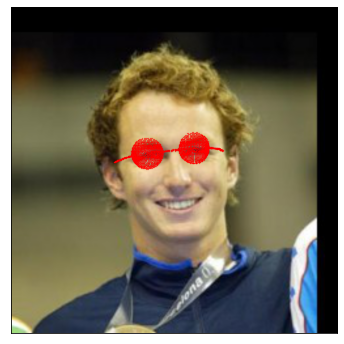

In [17]:
face_color = 'red'

fig1 = plt.figure(figsize=(6, 6))#, dpi=99.1)
#plt.scatter(x, y, s=0.5,color=rest_color)
plt.imshow(r_img)
plt.scatter(df_3dh.x.iloc[sunglasses_ind],df_3dh.y.iloc[sunglasses_ind],s=0.05, color=face_color)
plt.xticks([], [])
plt.yticks([], [])

([], [])

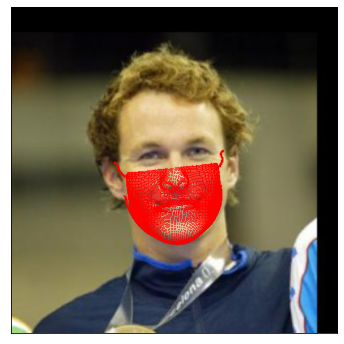

In [20]:
face_color = 'red'

fig1 = plt.figure(figsize=(6, 6))#, dpi=99.1)
#plt.scatter(x, y, s=0.5,color=rest_color)
plt.imshow(r_img)
plt.scatter(df_3dh.x.iloc[covid19_mask_ind],df_3dh.y.iloc[covid19_mask_ind],s=0.05, color=face_color)
plt.scatter(df_3dh.x.iloc[covid19_strings_ind],df_3dh.y.iloc[covid19_strings_ind],s=0.05, color=face_color)
#plt.scatter(df_3dh[sunglasses_ind], y[sunglasses_ind], s=0.5,color='k')
plt.xticks([], [])
plt.yticks([], [])

([], [])

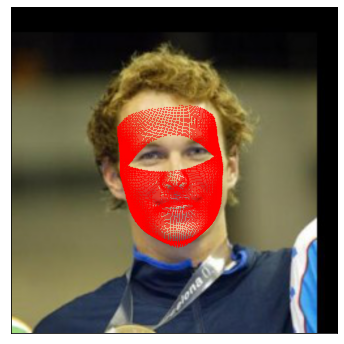

In [53]:
face_color = 'red'

llist0 = list(df_3dh.iloc[eye_mask_openning_ind].index)
llist2 = list(df_3dh.iloc[eyes_ind].index)
distinct_list = list(set(llist1) - set(llist2))

fig1 = plt.figure(figsize=(6, 6))
plt.imshow(r_img)
plt.scatter(df_3dh.x.iloc[distinct_list],df_3dh.y.iloc[distinct_list],s=0.05, color=face_color)
plt.xticks([], [])
plt.yticks([], [])

([], [])

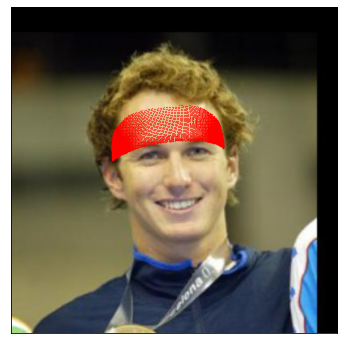

In [25]:
face_color = 'red'

fig1 = plt.figure(figsize=(6, 6))#, dpi=99.1)
#plt.scatter(x, y, s=0.5,color=rest_color)
plt.imshow(r_img)
plt.scatter(df_3dh.x.iloc[hat_inds],df_3dh.y.iloc[hat_inds],s=0.05, color=face_color)
#plt.scatter(df_3dh[sunglasses_ind], y[sunglasses_ind], s=0.5,color='k')
plt.xticks([], [])
plt.yticks([], [])